In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm
import numpy as np

Text(0.1, 0.05654363633416222, '')

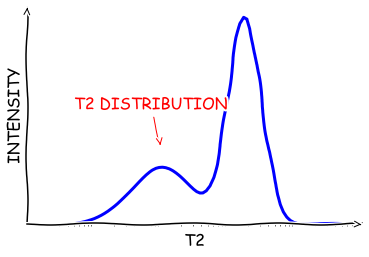

In [3]:
plt.xkcd(scale=1, length=100, randomness=2)  # Yes...
plt.rcParams.update({'font.size': 16})

def gaussian(tau2, sigma, T2):
    p = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(tau2-T2)**2/(2*sigma**2))
    return p

def gaussian_mixture(N, T2min=1e-1, T2max=1e4):
    t2 = np.logspace(np.log10(T2min),
                     np.log10(T2max),
                     N,
                     endpoint=True,
                     base=10.0)
    
    x = np.linspace(T2min, T2max, N)
    g1 = gaussian(x, 500, 6500) # norm.pdf(x, 7000, 200)
    g2 = gaussian(x, 900, 4000) # norm.pdf(x, 7000, 200)
    g = g1 + 0.5 * g2
    gnorm = g / np.sum(g)
    return t2, gnorm

T2min=1e-1; T2max=1e4
t2, g = gaussian_mixture(100, T2min, T2max)
    
fig, ax = plt.subplots(1, 1)
ax.plot(t2, g, 'b-', linewidth=3)
# ax.set_xlabel(r'$T_2\,\,/\,\,\mathrm{ms}$')
# ax.set_ylabel(r'$I\,\,/\,\,\mathrm{a.u.}$')

ax.set_xlabel('T2')
ax.set_ylabel("INTENSITY")

ax.set_xlim(T2min, T2max)
ax.set_ylim(0,)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.yticks([])
ax.set_xscale('log')
# plt.xticks([1, 100, 10000])
plt.xticks([])
plt.annotate('T2 DISTRIBUTION', xy=(10, 0.02), 
             arrowprops=dict(arrowstyle='->', color='red', connectionstyle="arc3"), 
             xytext=(0.5,0.03), 
             color='red')


# Draw arrow-heads at the end of axes lines
plt.annotate('', xy=(1e4, 0.0), 
             arrowprops=dict(arrowstyle='->', color='black'), 
             xytext=(9e3, 0.0))

ylim = ax.get_ylim()
plt.annotate('', xy=(1e-1, ylim[1]), 
             arrowprops=dict(arrowstyle='->', color='black'), 
             xytext=(1e-1, ylim[1]-0.0001))




In [94]:
fig.savefig('xkcd_t2.png', dpi=300, bbox_inches='tight')

Text(500, 0.5, 'MULTI- \n EXPONENTIAL')

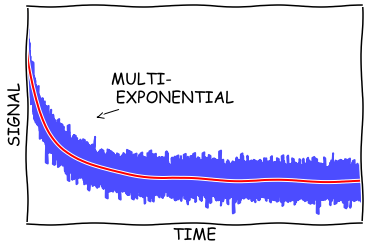

In [4]:
te = 0.1  # ms
t = np.arange(2e4) * te
m = np.sum(g * np.exp(- np.outer(t , 1 / t2)), axis=1)
mn = m + np.random.normal(loc=0, scale=0.05, size=len(m))


fig2, ax2 = plt.subplots(1, 1)
ax2.plot(t, mn, 'b-', alpha=0.7)
ax2.plot(t, m, 'r-')

# ax2.set_xlabel(r'$t\,\,/\,\,\mathrm{ms}$')
# ax2.set_ylabel(r'$M(t)\,\,/\,\,M(0)$')
ax2.set_ylabel('SIGNAL')
ax2.set_xlabel('TIME')
plt.yticks([])
plt.xticks([])

ax2.set_xlim(0, t[-1])

plt.annotate('MULTI- \n EXPONENTIAL', xy=(400, 0.4), 
             arrowprops=dict(arrowstyle='->', color='black', connectionstyle="arc3"), 
             xytext=(500, 0.5), 
             color='black')

In [110]:
fig2.savefig('xkcd_decay.png', dpi=300, bbox_inxhes='tight')

Text(500, 0.5, 'MULTI- \n LINEAR?')

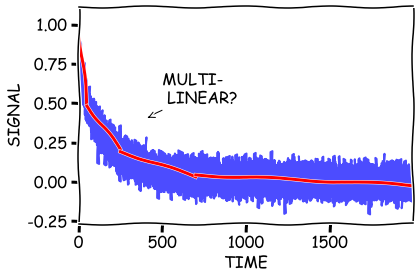

In [37]:
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(t, mn, 'b-', alpha=0.7)

x1 = np.linspace(0, 50, 100)
x2 = np.linspace(50, 250, 100)
x3 = np.linspace(250, 700, 100)
x4 = np.linspace(700, 2000, 100)

def linfunc(x, m, n):
    return m * x + n

ax3.plot(x1, linfunc(x1, -0.01, 1.0), 'r-', linewidth=3)
ax3.plot(x2, linfunc(x2, -0.00135, 0.55), 'r-', linewidth=3)
ax3.plot(x3, linfunc(x3, -0.00035, 0.28), 'r-', linewidth=3)
ax3.plot(x4, linfunc(x4, -0.00005, 0.08), 'r-', linewidth=3)

ax3.set_ylabel('SIGNAL')
ax3.set_xlabel('TIME')
# plt.yticks([])
# plt.xticks([])

ax3.set_xlim(0, t[-1])

plt.annotate('MULTI- \n LINEAR?', xy=(400, 0.4), 
             arrowprops=dict(arrowstyle='->', color='black', connectionstyle="arc3"), 
             xytext=(500, 0.5), 
             color='black')


In [38]:
fig3.savefig('multi_linear.png', dpi=300, bbox_inches='tight')